In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [25]:
data = yf.download('AAPL', start='2010-01-01', end='2023-01-01')

[*********************100%***********************]  1 of 1 completed


In [26]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.454506,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.465663,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.362820,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.351057,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.393280,447610800
...,...,...,...,...,...,...
2022-12-23,130.919998,132.419998,129.639999,131.860001,130.631363,63814900
2022-12-27,131.380005,131.410004,128.720001,130.029999,128.818405,69007800
2022-12-28,129.669998,131.029999,125.870003,126.040001,124.865593,85438400


In [27]:
data = data[['Close']]
data

,Close
Date,
2010-01-04,7.643214
2010-01-05,7.656429
2010-01-06,7.534643
2010-01-07,7.520714
2010-01-08,7.570714
...,...
2022-12-23,131.860001
2022-12-27,130.029999
2022-12-28,126.040001


#### Visualize the closing price

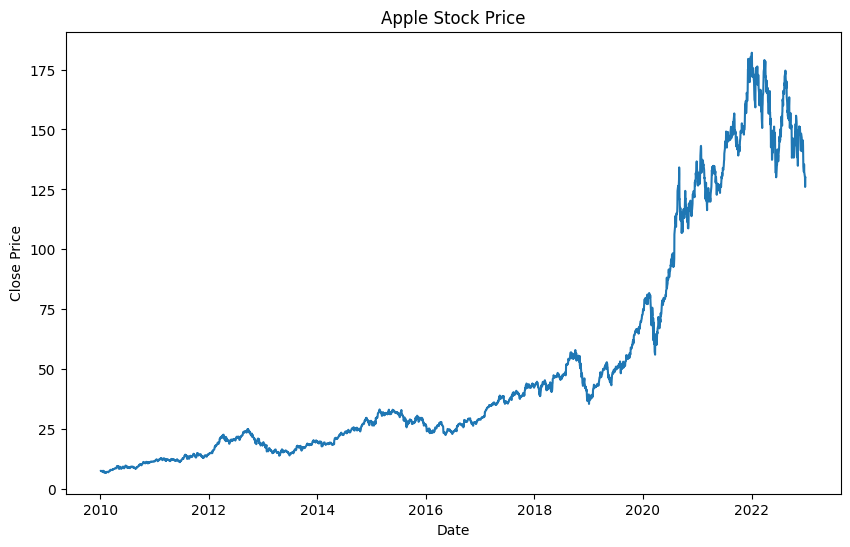

In [28]:
plt.figure(figsize=(10, 6))
plt.plot(data['Close'])
plt.title('Apple Stock Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

In [29]:
from sklearn.preprocessing import MinMaxScaler

In [30]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

In [31]:
scaled_data

array([[0.00447776],
       [0.00455321],
       [0.00385789],
       ...,
       [0.68044731],
       [0.70082972],
       [0.70265667]])

In [32]:
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        a = data[i:(i + time_step), 0]
        X.append(a)
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

In [33]:
time_step = 60
X, y = create_dataset(scaled_data, time_step)

In [34]:
X = X.reshape(X.shape[0], X.shape[1], 1)
X

array([[[0.00447776],
        [0.00455321],
        [0.00385789],
        ...,
        [0.00792173],
        [0.00822555],
        [0.00893106]],

       [[0.00455321],
        [0.00385789],
        [0.00377836],
        ...,
        [0.00822555],
        [0.00893106],
        [0.00875774]],

       [[0.00385789],
        [0.00377836],
        [0.00406383],
        ...,
        [0.00893106],
        [0.00875774],
        [0.00895553]],

       ...,

       [[0.74987307],
        [0.77413784],
        [0.79497705],
        ...,
        [0.73417234],
        [0.7157882 ],
        [0.71367577]],

       [[0.77413784],
        [0.79497705],
        [0.79668979],
        ...,
        [0.7157882 ],
        [0.71367577],
        [0.70322764]],

       [[0.79497705],
        [0.79668979],
        [0.7911517 ],
        ...,
        [0.71367577],
        [0.70322764],
        [0.68044731]]])

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [52]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(25))
model.add(Dense(1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [53]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [54]:
history = model.fit(X_train, y_train, batch_size=32, epochs=50, validation_split=0.2)

Epoch 1/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0236 - val_loss: 3.4336e-04
Epoch 2/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0017 - val_loss: 3.9686e-04
Epoch 3/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0016 - val_loss: 3.1178e-04
Epoch 4/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0015 - val_loss: 5.1827e-04
Epoch 5/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0017 - val_loss: 3.2062e-04
Epoch 6/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 9.1044e-04 - val_loss: 3.1176e-04
Epoch 7/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0015 - val_loss: 2.5127e-04
Epoch 8/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0010 - val_loss: 6.7319e-04
Epoch 9/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 9.9901e-04 - val_loss: 3.0511e-04
Epoch 10/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 9.3710e-04 - val_loss: 4.2925e-04
Epoch 11/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 8.4552e-04 - val_loss: 3.6283e-04
Epoch 12/5

#### Training v/s Validation loss

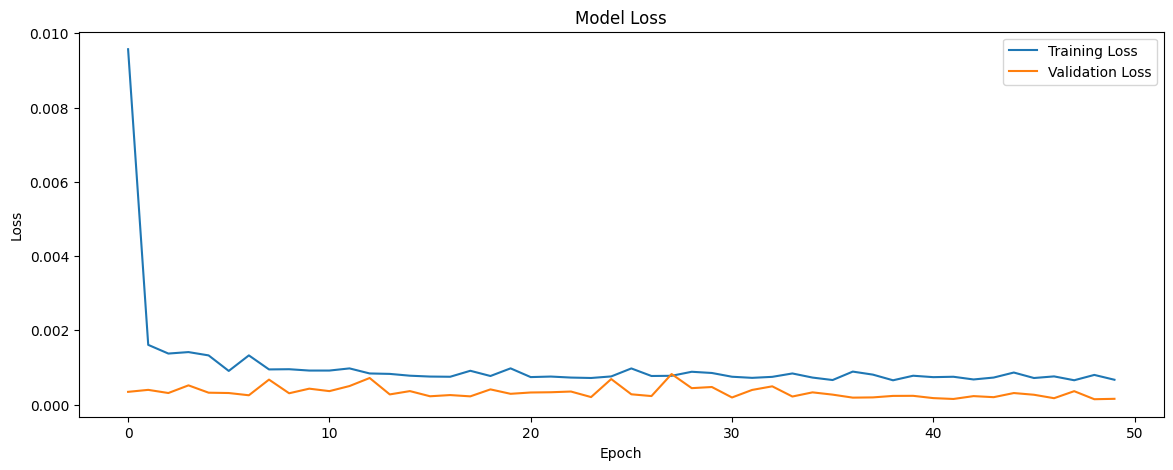

In [55]:
plt.figure(figsize=(14, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [56]:
y_pred = model.predict(X_test)

y_pred_actual = scaler.inverse_transform(y_pred)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [57]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test_actual, y_pred_actual)
r2 = r2_score(y_test_actual, y_pred_actual)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R2 Score: {r2:.2f}")

Mean Squared Error: 4.21
R2 Score: 1.00


### A Mean Squared Error (MSE) of 4.21 and an R² Score of 1.00 indicate that our LSTM model has performed exceptionally well on the test dataset.

#### Visualize the predicted prices against actual prices

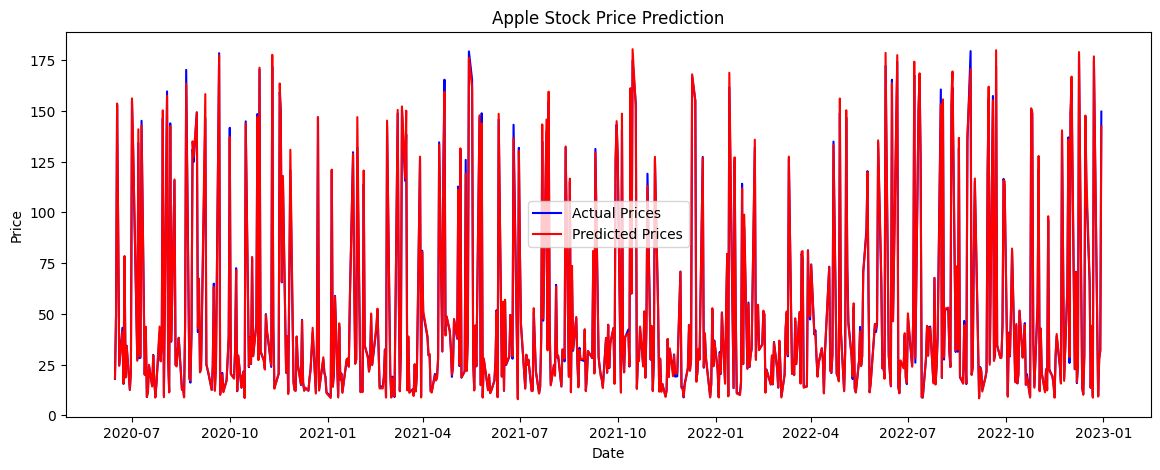

In [58]:
plt.figure(figsize=(14, 5))
plt.plot(data.index[-len(y_test):], y_test_actual, color='blue', label='Actual Prices')
plt.plot(data.index[-len(y_test):], y_pred_actual, color='red', label='Predicted Prices')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()